In [61]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Import functions Pole and StCoordLine
import sys, os
sys.path.append(os.path.abspath('../functions'))

# Old API
from Pole import Pole as Pole
from StCoordLine import StCoordLine as StCoordLine

# New API
from pole_utils import pole_from_plane
from st_coord_line import eq_angle_stereonet, eq_area_stereonet

In [62]:
# Plot the following four lines (trend and plunge)
# on an equal angle or equal area stereonet
lines = np.array([[30, 30],[120, 45],[210, 65],[280, 15]])
pi = np.pi

# Old API
linesr = lines * pi/180 # lines in radians


# New API
linesr = np.radians(lines) # lines in radians

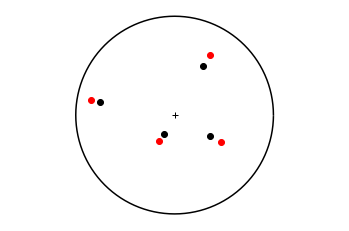

In [63]:
# Old API
# Plot the primitive of the stereonet
r = 1; # unit radius
TH = np.arange(0,360,1)*pi/180
x = r * np.cos(TH)
y = r * np.sin(TH)
plt.plot(x,y,'k')
# Plot center of circle
plt.plot(0,0,'k+')
# Make axes equal and remove them
plt.axis('equal')
plt.axis('off')

# Find the coordinates of the lines in the
# equal angle or equal area stereonet
nrow, ncol = lines.shape
eqAngle = np.zeros((nrow, ncol))
eqArea = np.zeros((nrow, ncol))

for i in range(nrow):
    # Equal angle coordinates
    eqAngle[i,0], eqAngle[i,1] = StCoordLine(linesr[i,0],linesr[i,1],0) 
    # Equal area coordinates
    eqArea[i,0], eqArea[i,1] = StCoordLine(linesr[i,0],linesr[i,1],1)    

    
# Plot the lines
# Equal angle as black dots
plt.plot(eqAngle[:,0],eqAngle[:,1],'ko')
# Equal area as red dots
plt.plot(eqArea[:,0],eqArea[:,1],'ro');

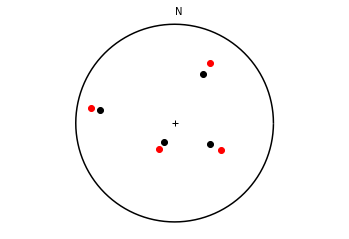

In [64]:
# New API
# Plot the primitive of the stereonet
r = 1; # unit radius
TH = np.arange(0,360)*pi/180
x = r * np.cos(TH)
y = r * np.sin(TH)
plt.plot(x,y,'k')
# Plot center of circle
plt.plot(0,0,'k+')
# Plot North label
plt.text(0,1.1,'N')
# Make axes equal and remove them
plt.axis('equal')
plt.axis('off')

# Find the coordinates of the lines in the
# equal angle or equal area stereonet
nrow, ncol = lines.shape
eq_angle = np.zeros((nrow, ncol))
eq_area = np.zeros((nrow, ncol))

for i in range(nrow):
    # Equal angle coordinates
    eq_angle[i,0], eq_angle[i,1] = eq_angle_stereonet(linesr[i,0],linesr[i,1]) 
    # Equal area coordinates
    eq_area[i,0], eq_area[i,1] = eq_area_stereonet(linesr[i,0],linesr[i,1])
    
# Plot the lines
# Equal angle as black dots
plt.plot(eq_angle[:,0],eq_angle[:,1],'ko')
# Equal area as red dots
plt.plot(eq_area[:,0],eq_area[:,1],'ro');


In [65]:
# Plot the following four planes (strike and dip, RHR)
# as poles on an equal angle or equal area stereonet
planes = np.array([[0, 30], [90, 50], [180, 15], [270, 65]])

#Old API
planesr = planes * pi/180 # planes in radians

#New API
planesr = np.radians(planes) # lines in radians

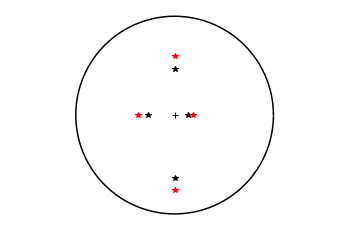

In [66]:
#Old API
# Plot the primitive of the stereonet
plt.plot(x,y,'k')
# Plot center of circle
plt.plot(0,0,'k+')
# Make axes equal and remove them
plt.axis('equal')
plt.axis('off')

# Find the coordinates of the poles to the planes in the
# equal angle or equal area stereonet
for i in range(nrow):
    # Compute pole of plane
    trend, plunge = Pole(planesr[i,0],planesr[i,1],1)
    # Equal angle coordinates
    eqAngle[i,0], eqAngle[i,1] = StCoordLine(trend,plunge,0) 
    # Equal area coordinates
    eqArea[i,0], eqArea[i,1] = StCoordLine(trend,plunge,1)

# Plot the poles
# Equal angle as black asterisks
plt.plot(eqAngle[:,0],eqAngle[:,1],'k*')
# Equal area as red asterisks
plt.plot(eqArea[:,0],eqArea[:,1],'r*');

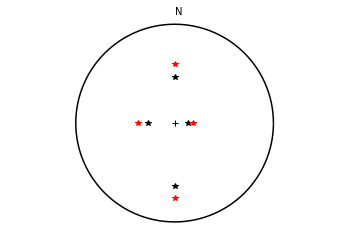

In [67]:
#New API
# Plot the primitive of the stereonet
plt.plot(x,y,'k')
# Plot center of circle
plt.plot(0,0,'k+')
# Plot North label
plt.text(0,1.1,'N')
# Make axes equal and remove them
plt.axis('equal')
plt.axis('off')

# Find the coordinates of the poles to the planes in the
# equal angle or equal area stereonet
for i in range(nrow):
    # Compute pole of plane
    trend, plunge = pole_from_plane(planesr[i,0],planesr[i,1])
    # Equal angle coordinates
    eq_angle[i,0], eq_angle[i,1] = eq_angle_stereonet(trend,plunge) 
    # Equal area coordinates
    eq_area[i,0], eq_area[i,1] = eq_area_stereonet(trend,plunge)

# Plot the poles
# Equal angle as black asterisks
plt.plot(eq_angle[:,0],eq_angle[:,1],'k*')
# Equal area as red asterisks
plt.plot(eq_area[:,0],eq_area[:,1],'r*');